# Project 11 -- Atulya Kadur

I got help from Piazza

## Question 1

In [72]:
options(jupyter.rich_display = F)

In [74]:
library(ggplot2)

In [13]:
options(repr.matrix.max.cols = 30, repr.matrix.max.rows = 30)

In [14]:
library(data.table)

In [24]:
orders <- fread("/anvil/projects/tdm/data/restaurant/orders.csv")

In [25]:
head(orders)

  akeed_order_id customer_id item_count grand_total payment_mode promo_code
1 163238         92PEE24     1           7.6        2                      
2 163240         QS68UD8     1           8.7        1                      
3 163241         MB7VY5F     2          14.4        1                      
4 163244         KDJ951Y     1           7.1        1                      
5 163245         BAL0RVT     4          27.2        1                      
6 163246         U263OCD     3          18.2        2                      
  vendor_discount_amount promo_code_discount_percentage is_favorite is_rated
1 0                      NA                                         No      
2 0                      NA                                         No      
3 0                      NA                                         No      
4 0                      NA                                         No      
5 0                      NA                                         No      
6 0   

In [17]:
head(orders$created_at)

[1] "2019-08-01 05:30:16 UTC" "2019-08-01 05:31:10 UTC"
[3] "2019-08-01 05:31:33 UTC" "2019-08-01 05:34:54 UTC"
[5] "2019-08-01 05:35:51 UTC" "2019-08-01 05:37:05 UTC"

In [18]:
#answer 1a
orders$created_at <- as.Date(orders$created_at)

In [20]:
tail(orders$created_at)

[1] "2020-02-29" "2020-02-29" "2020-02-29" "2020-02-29" "2020-02-29"
[6] "2020-02-29"

In [35]:
#answer 1b
years <- unique(format(as.Date(orders$created_at, format="%d/%m/%Y"),"%Y"))

In [37]:
head(years)

[1] "2019" "2020"

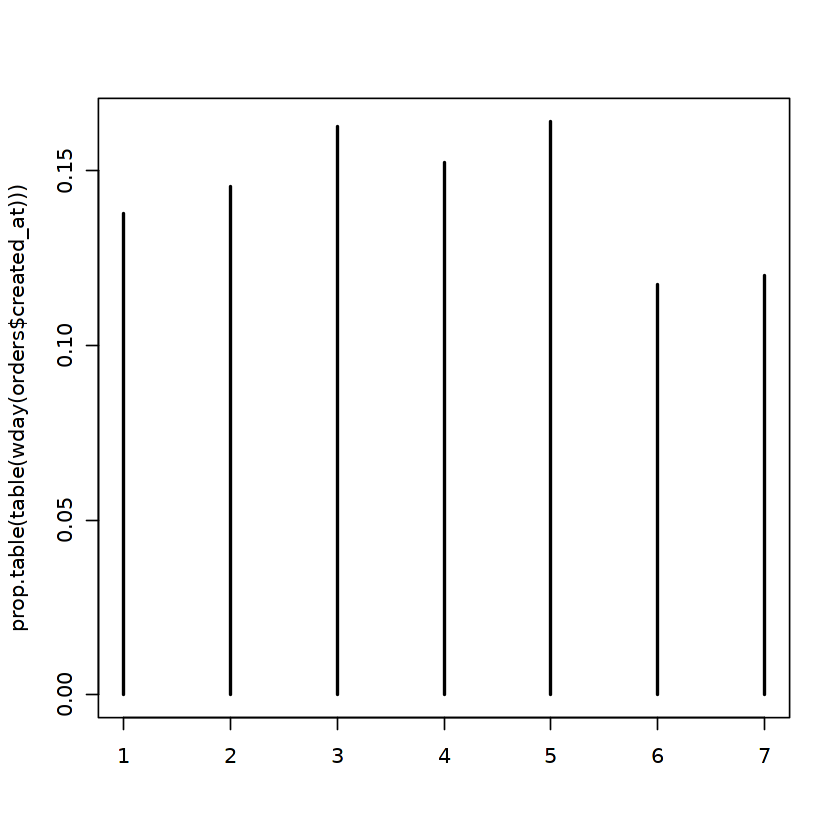

In [39]:
#answer 1c
plot(prop.table(table(wday(orders$created_at))))

This graph demonstrates that during the weekends we see a drop in orders. In the middle of the week, there is a peak of orders demonstrating that orders are higher when people have more work to do. There is less orders when people traditionally go out, Saturday and Sunday.

## Question 2

In [43]:
# answer 2a
tapply(orders$vendor_id, year(orders$created_at), function(x) {head(sort(table(x), decreasing = TRUE))})

$`2019`
x
 113   78  105   83   79   84 
5935 4643 4513 3639 3193 2860 

$`2020`
x
 846   84   79  113  386  849 
2556 2141 1924 1872 1160 1067 


In [50]:
#answer 2b
tapply(orders$grand_total[year(orders$created_at) == 2019], orders$vendor_id[year(orders$created_at) == 2019], function(x) {mean(sort(table(x), decreasing=TRUE))})[c("113", "78", "105", "83", "79", "84")]
tapply(orders$grand_total[year(orders$created_at) == 2020], orders$vendor_id[year(orders$created_at) == 2020], function(x) {mean(sort(table(x), decreasing=TRUE))})[c("846", "84", "79", "113", "386", "849")]

     113       78      105       83       79       84 
26.73423 21.10455 21.08879 14.91393 17.25946 13.95122 

      846        84        79       113       386       849 
 9.000000 11.510753 11.251462 12.315789 10.357143  4.985981 

The averages are very similar for the top 3 indicating that the top 3 might be cornering the ordering out market in 2019. There is a clear difference between 2019 and 2020. As the pandemic hit, it seemed, counterintuitively ordering out dropped.

## Question 3

In [68]:
beforeFive <- table( wday(orders$created_at)[hour(orders$created_at) < 17]  )
afterFive <- table( wday(orders$created_at)[hour(orders$created_at) >= 17]  )

In [77]:
myDF <- data.frame(group=c(rep("before five",times=7),rep("after five",times=7)), 
                   mycounts=c(beforeFive, afterFive), 
                   index=c(1:7, 1:7))

Warning message in data.frame(group = c(rep("before five", times = 7), rep("after five", :
"row names were found from a short variable and have been discarded"


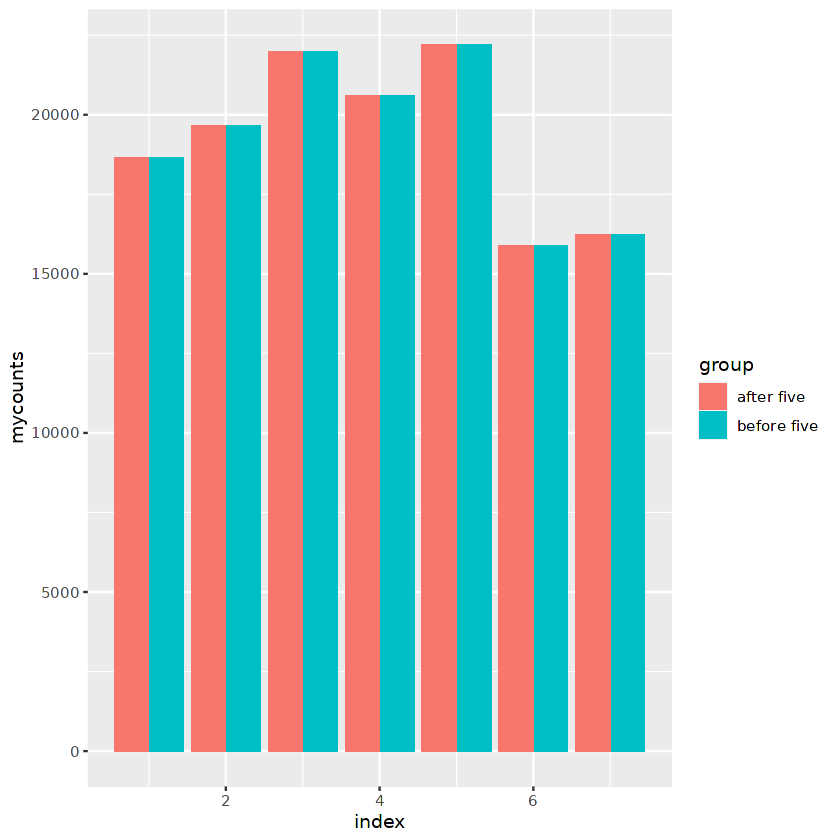

In [78]:
ggplot(myDF, aes(index, mycounts, fill=group)) + geom_col(position = "dodge")

Markdown notes and sentences and analysis written here.

## Question 4

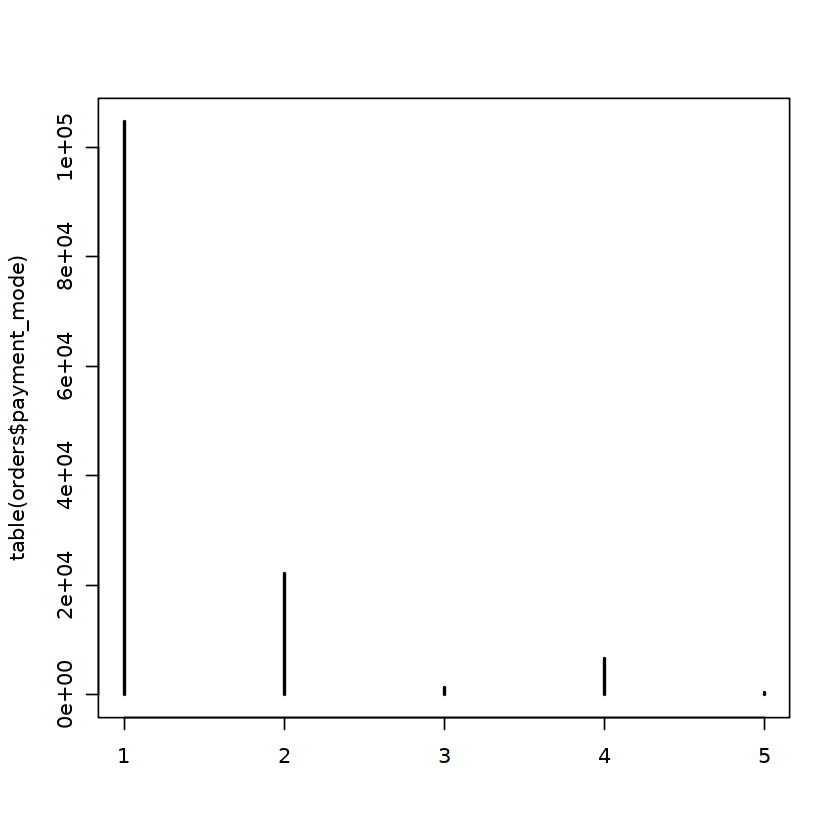

In [96]:
# code here
plot(table(orders$payment_mode))

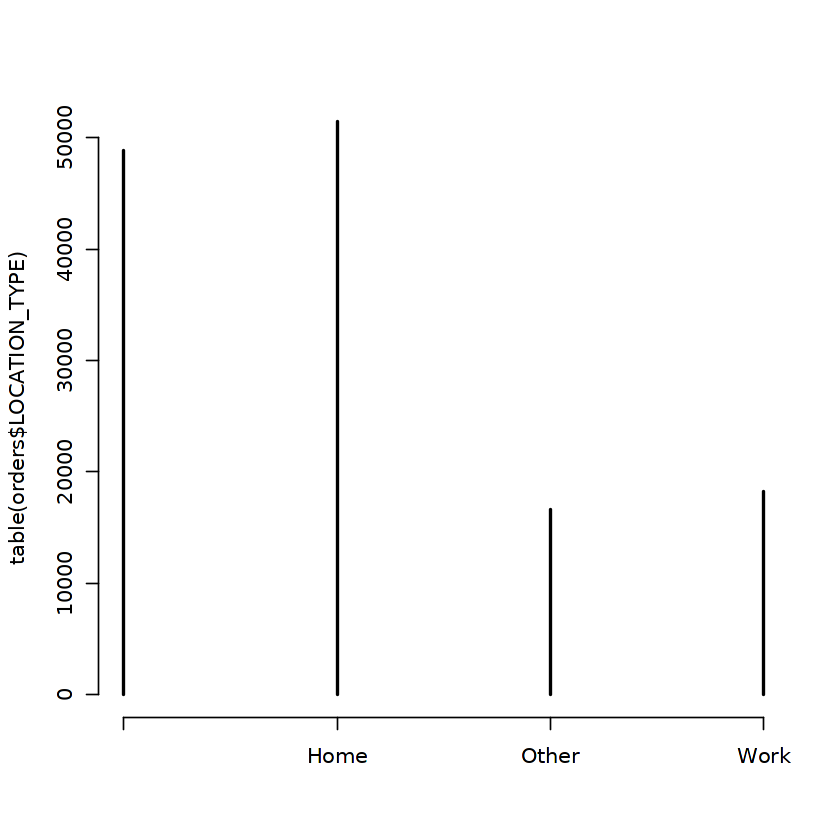

In [95]:
plot(table(orders$LOCATION_TYPE))

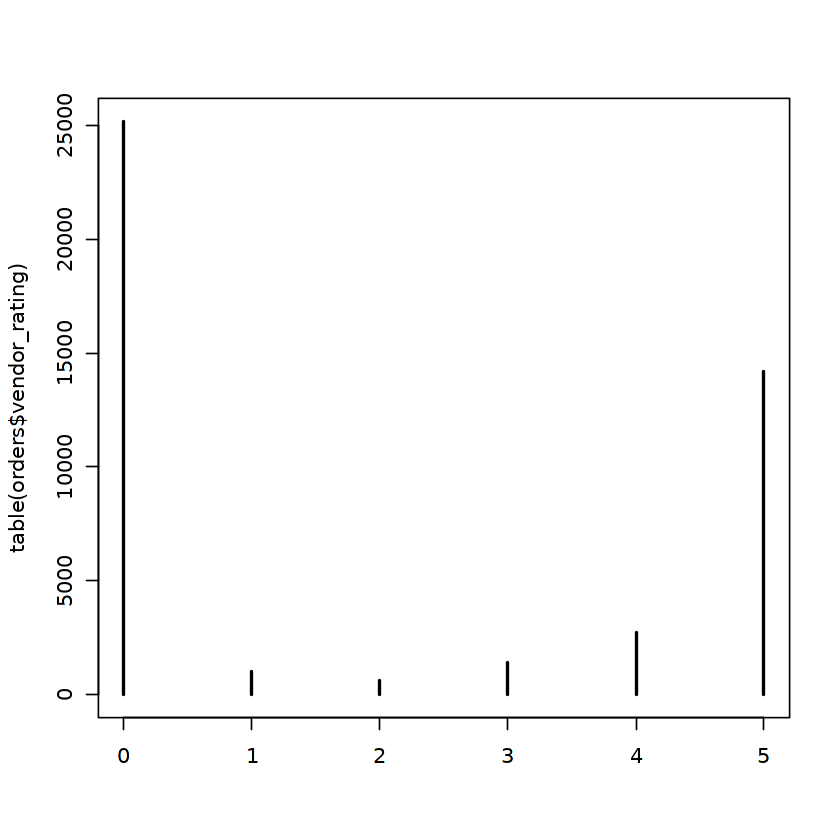

In [97]:
plot(table(orders$vendor_rating))

# Graph 1
This one demonstrates which payment option is the most popular. We can see that 1 and 2 are clear favorites while the rest have their place but are not as significant. I thought this was interesting becuase as we head into a more digitized finance, we see that change refelcted in the data.

# Graph 2
This graph shows the delivery location. This can be valuable if you want to know where your customers are. I found it interesting there was more leaning toward Home and not a bit more even between home and work.

# Graph 3
This graph is interesting as it shows how the vendor ratings have changed over time. We see that there are many 0's indicating either no one has made a review or it is not great. There are a lot of 5s to indicating that potentially less people are rating if they have a not so awesome experience.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.